In [87]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [88]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad

In [89]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [90]:
id(x),id(y),id(x.grad)

(139945652178032, 139945652785456, 94810602925312)

**y=2*xTx**  
**dy/dx=4*x**

In [91]:
y.backward()
x.grad,id(x.grad)

(tensor([ 0.,  4.,  8., 12.]), 139945652547392)

In [92]:
x.grad == 4 * x

tensor([True, True, True, True])

**y=x0+x1+x2+x3**  
**dy/dxn=1**

In [93]:
x.grad.zero_()
y = x.sum()
y.backward()
x,y,x.grad

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor(6., grad_fn=<SumBackward0>),
 tensor([1., 1., 1., 1.]))

grad_fn  references a function that has created a function
detach() clears grad_fn, 

In [94]:
x.grad.zero_()
y = x * x
u = y.detach()
x,y,u


(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>),
 tensor([0., 1., 4., 9.]))

- gradient=u

In [95]:
z = u * x
z.sum().backward()
x,z,x.grad,y,x.grad == y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>),
 tensor([0., 1., 4., 9.]),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>),
 tensor([True, True, True, True]))

- gradient=3*x**2

In [96]:
x.grad.zero_()
z = y * x
z.sum().backward()
x,z,x.grad,y,x.grad == y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>),
 tensor([ 0.,  3., 12., 27.]),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>),
 tensor([ True, False, False, False]))

- EX

In [97]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
import math


In [98]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [99]:
def set_figsize(figsize=(5, 5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
    #@save

In [100]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [101]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(5, 5), axes=None):
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

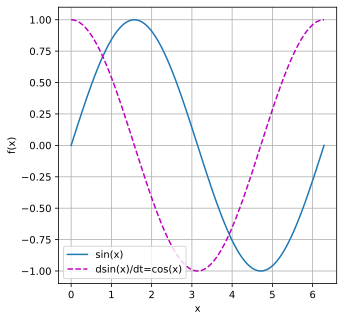

In [102]:
x = torch.linspace(0, 2 * 3.1416, 100, requires_grad=True)  # 0 to 2*pi, 100 points



# Calculate the sine function and its autograd result
y = torch.sin(x)
y.backward(torch.ones_like(x))

# Convert the torch tensors to NumPy arrays for plotting
x_np = x.detach().numpy()
y_np = y.detach().numpy()
dy_dx_np = x.grad.detach().numpy()

plot(x_np, [y_np, dy_dx_np], 'x', 'f(x)', legend=['sin(x)', 'dsin(x)/dt=cos(x)'])


# BEAUTIFULLLLLLL!!!!!!!